#Problem Statement
Predicting median salary on the basis of the given features(of employment rate, Unemployment rate, High skilled employement rate) in the time series data

# Importing important dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import  plot_roc_curve, roc_auc_score

#Importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/Othercomputers/HP Probook/Machine Learning/Miscellenous/De MontFort University/Dessertation demontfort/Mergeddata.xlsx"
df = pd.read_excel(path)
df.head()

,time_period,Quarter,age_group,Unnamed: 3,gender,graduate_type,Emp_prop,Emp_prop_upper,Emp_prop_lower,HSEmp_prop,HSEmp_prop_upper,HSEmp_prop_lower,Unemp_prop,Unemp_prop_upper,Unemp_prop_lower,median
0,2007,Q1,Age Group 16-64,NaN,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000
1,2007,Q1,Age Group 16-64,NaN,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000
2,2007,Q2,Age Group 16-64,NaN,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000
3,2007,Q2,Age Group 16-64,NaN,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000
4,2007,Q3,Age Group 16-64,NaN,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000


In [4]:
df.drop('Unnamed: 3', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_period       720 non-null    int64  
 1   Quarter           720 non-null    object 
 2   age_group         720 non-null    object 
 3   gender            720 non-null    object 
 4   graduate_type     720 non-null    object 
 5   Emp_prop          720 non-null    float64
 6   Emp_prop_upper    720 non-null    float64
 7   Emp_prop_lower    720 non-null    float64
 8   HSEmp_prop        720 non-null    float64
 9   HSEmp_prop_upper  720 non-null    float64
 10  HSEmp_prop_lower  720 non-null    float64
 11  Unemp_prop        720 non-null    float64
 12  Unemp_prop_upper  720 non-null    float64
 13  Unemp_prop_lower  720 non-null    float64
 14  median            720 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 84.5+ KB


In [5]:
df.describe()

,time_period,Emp_prop,Emp_prop_upper,Emp_prop_lower,HSEmp_prop,HSEmp_prop_upper,HSEmp_prop_lower,Unemp_prop,Unemp_prop_upper,Unemp_prop_lower,median
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2014.000000,81.337778,82.780278,79.900000,52.590000,54.355556,50.825000,5.394167,6.280833,4.506111,27633.333333
std,4.323497,7.979955,8.387634,7.637179,23.838539,24.512422,23.200931,2.725483,2.815039,2.744810,7398.567692
min,2007.000000,66.400000,66.900000,65.300000,15.500000,16.400000,14.500000,1.800000,2.300000,0.600000,15500.000000
25%,2010.000000,72.300000,73.075000,71.575000,22.100000,22.800000,21.600000,3.400000,4.175000,2.400000,22500.000000
50%,2014.000000,85.600000,87.400000,83.950000,63.900000,65.650000,62.100000,4.750000,5.800000,3.600000,27000.000000
75%,2018.000000,87.425000,88.900000,86.000000,73.100000,76.900000,69.200000,6.700000,7.825000,5.900000,33250.000000
max,2021.000000,91.700000,94.000000,89.500000,82.100000,83.500000,80.700000,13.300000,14.300000,12.400000,45000.000000


In [6]:
df.corr()

,time_period,Emp_prop,Emp_prop_upper,Emp_prop_lower,HSEmp_prop,HSEmp_prop_upper,HSEmp_prop_lower,Unemp_prop,Unemp_prop_upper,Unemp_prop_lower,median
time_period,1.000000,0.108423,0.111499,0.104234,0.001001,0.004858,-0.002970,-0.222652,-0.208026,-0.229288,0.205051
Emp_prop,0.108423,1.000000,0.996247,0.995409,0.947721,0.950472,0.943288,-0.808741,-0.719477,-0.871728,0.709327
Emp_prop_upper,0.111499,0.996247,1.000000,0.983425,0.943376,0.949279,0.935617,-0.780610,-0.677843,-0.858554,0.679882
Emp_prop_lower,0.104234,0.995409,0.983425,1.000000,0.944048,0.943294,0.943328,-0.832373,-0.758814,-0.878311,0.735568
HSEmp_prop,0.001001,0.947721,0.943376,0.944048,1.000000,0.999252,0.999166,-0.792294,-0.709867,-0.847702,0.802375
HSEmp_prop_upper,0.004858,0.950472,0.949279,0.943294,0.999252,1.000000,0.996845,-0.783245,-0.694644,-0.845389,0.787893
HSEmp_prop_lower,-0.002970,0.943288,0.935617,0.943328,0.999166,0.996845,1.000000,-0.800689,-0.724922,-0.848881,0.816391
Unemp_prop,-0.222652,-0.808741,-0.780610,-0.832373,-0.792294,-0.783245,-0.800689,1.000000,0.982225,0.980954,-0.750948
Unemp_prop_upper,-0.208026,-0.719477,-0.677843,-0.758814,-0.709867,-0.694644,-0.724922,0.982225,1.000000,0.927390,-0.739420
Unemp_prop_lower,-0.229288,-0.871728,-0.858554,-0.878311,-0.847702,-0.845389,-0.848881,0.980954,0.927390,1.000000,-0.734120


#Data Preparation

In [7]:
df.head()

,time_period,Quarter,age_group,gender,graduate_type,Emp_prop,Emp_prop_upper,Emp_prop_lower,HSEmp_prop,HSEmp_prop_upper,HSEmp_prop_lower,Unemp_prop,Unemp_prop_upper,Unemp_prop_lower,median
0,2007,Q1,Age Group 16-64,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000
1,2007,Q1,Age Group 16-64,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000
2,2007,Q2,Age Group 16-64,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000
3,2007,Q2,Age Group 16-64,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000
4,2007,Q3,Age Group 16-64,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000


In [8]:
df['Quarter'] = df['Quarter'].replace(['Q1'],'1')
df['Quarter'] = df['Quarter'].replace(['Q2'],'4')
df['Quarter'] = df['Quarter'].replace(['Q3'],'7')
df['Quarter'] = df['Quarter'].replace(['Q4'],'10')

In [9]:
df.rename(columns={'Quarter':'Month',
                   'time_period':'Year'}, inplace=True)

In [10]:
df.rename(columns=(str.lower), inplace=True)

In [11]:
df.head()

,year,month,age_group,gender,graduate_type,emp_prop,emp_prop_upper,emp_prop_lower,hsemp_prop,hsemp_prop_upper,hsemp_prop_lower,unemp_prop,unemp_prop_upper,unemp_prop_lower,median
0,2007,1,Age Group 16-64,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000
1,2007,1,Age Group 16-64,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000
2,2007,4,Age Group 16-64,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000
3,2007,4,Age Group 16-64,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000
4,2007,7,Age Group 16-64,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000


In [12]:
len(df)

720

In [13]:
df['day'] = 1
df.head()

,year,month,age_group,gender,graduate_type,emp_prop,emp_prop_upper,emp_prop_lower,hsemp_prop,hsemp_prop_upper,hsemp_prop_lower,unemp_prop,unemp_prop_upper,unemp_prop_lower,median,day
0,2007,1,Age Group 16-64,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000,1
1,2007,1,Age Group 16-64,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000,1
2,2007,4,Age Group 16-64,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000,1
3,2007,4,Age Group 16-64,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000,1
4,2007,7,Age Group 16-64,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000,1


In [14]:
# df=df.astype({'day': 'int64',
#            'month':'int64'}).dtypes
date = pd.to_datetime(df[["year", "month", "day"]])
df['date'] = date
df.head()

,year,month,age_group,gender,graduate_type,emp_prop,emp_prop_upper,emp_prop_lower,hsemp_prop,hsemp_prop_upper,hsemp_prop_lower,unemp_prop,unemp_prop_upper,unemp_prop_lower,median,day,date
0,2007,1,Age Group 16-64,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000,1,2007-01-01
1,2007,1,Age Group 16-64,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000,1,2007-01-01
2,2007,4,Age Group 16-64,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000,1,2007-04-01
3,2007,4,Age Group 16-64,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000,1,2007-04-01
4,2007,7,Age Group 16-64,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000,1,2007-07-01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              720 non-null    int64         
 1   month             720 non-null    object        
 2   age_group         720 non-null    object        
 3   gender            720 non-null    object        
 4   graduate_type     720 non-null    object        
 5   emp_prop          720 non-null    float64       
 6   emp_prop_upper    720 non-null    float64       
 7   emp_prop_lower    720 non-null    float64       
 8   hsemp_prop        720 non-null    float64       
 9   hsemp_prop_upper  720 non-null    float64       
 10  hsemp_prop_lower  720 non-null    float64       
 11  unemp_prop        720 non-null    float64       
 12  unemp_prop_upper  720 non-null    float64       
 13  unemp_prop_lower  720 non-null    float64       
 14  median            720 non-

# Data Analysis

In [16]:
#time series graphs
#Comparison of age groups bar graph
# comparison of graduates 

In [17]:
df.head(8)

,year,month,age_group,gender,graduate_type,emp_prop,emp_prop_upper,emp_prop_lower,hsemp_prop,hsemp_prop_upper,hsemp_prop_lower,unemp_prop,unemp_prop_upper,unemp_prop_lower,median,day,date
0,2007,1,Age Group 16-64,Gender Female,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,27000,1,2007-01-01
1,2007,1,Age Group 16-64,Gender Male,Graduate,87.2,88.1,86.4,68.9,70.0,67.7,2.6,3.0,2.2,33000,1,2007-01-01
2,2007,4,Age Group 16-64,Gender Female,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,27000,1,2007-04-01
3,2007,4,Age Group 16-64,Gender Male,Graduate,87.1,87.9,86.2,68.9,70.0,67.7,2.7,3.2,2.3,33000,1,2007-04-01
4,2007,7,Age Group 16-64,Gender Female,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,27000,1,2007-07-01
5,2007,7,Age Group 16-64,Gender Male,Graduate,86.6,87.4,85.7,67.7,68.9,66.6,3.2,3.7,2.8,33000,1,2007-07-01
6,2007,10,Age Group 16-64,Gender Female,Graduate,88.3,89.1,87.5,69.4,70.6,68.3,2.6,3.0,2.1,27000,1,2007-10-01
7,2007,10,Age Group 16-64,Gender Male,Graduate,88.3,89.1,87.5,69.4,70.6,68.3,2.6,3.0,2.1,33000,1,2007-10-01


In [18]:
subdata = df[['date','median','emp_prop','hsemp_prop','unemp_prop','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata = subdata[subdata['gender'] == 'Gender Male']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
fig = px.line(subdata, x='date',y='emp_prop',title='Employment rate by type of Graduation in Uk', color="graduate_type")
fig.show()
#trend shows high correlation among graduate and post graduate, while no relationship in comparison to postgraduate


In [19]:
subdata = df[['date','median','emp_prop','hsemp_prop','unemp_prop','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata = subdata[subdata['gender'] == 'Gender Male']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
fig = px.line(subdata, x='date',y='hsemp_prop',title=' High skilled Employment rate by type of  Graduation', color="graduate_type")
fig.show()
#favours more hight degree graduates
#more stable job market

In [25]:
subdata = df[['date','median','emp_prop','hsemp_prop','unemp_prop','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata = subdata[subdata['gender'] == 'Gender Male']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
fig = px.line(subdata, x='date',y='unemp_prop',title='UnEmployment rate by type of  Graduation', color="graduate_type")
fig.show()

In [28]:
#Taking average for graduate,Non-Graduate,Postgraduate of Female data
subdata=[]
subdata = df[['date','median','emp_prop','hsemp_prop','unemp_prop','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['gender'] == 'Gender Female']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata1 = subdata[subdata['graduate_type'] == 'Graduate']
subdata2 = subdata[subdata['graduate_type'] == 'Non-Graduate']
subdata3 = subdata[subdata['graduate_type'] == 'Postgraduate']
# subdata = subdata.groupby('date').count().reset_index(drop=False)
subdata11 = subdata1['graduate_type']
subdata12 = subdata1['median']
subdata22 = subdata2['graduate_type']
subdata21 = subdata2['median']
subdata33 = subdata3['graduate_type']
subdata31 = subdata3['median']
subdata33.reset_index(drop=True,inplace=True)
subdata22.reset_index(drop=True,inplace=True)
subdata31.reset_index(drop=True,inplace=True)
subdata21.reset_index(drop=True,inplace=True)
subdata12.reset_index(drop=True,inplace=True)
subdata11.reset_index(drop=True,inplace=True)
subdata4 = pd.DataFrame({'Graduate':subdata11,
                         'Median1':subdata12,
                          'Non-Graduate': subdata22,
                         'Median2':subdata21,
                          'Postgraduate': subdata33,
                         'Median3': subdata31})
subdata4['overall_median'] = ((
                              (subdata4.Median1+
                              subdata4.Median2+
                              subdata4.Median3)/3).round().astype('int')
)
subdata1.reset_index(drop=True, inplace=True)
overall_df = []
overall_df =subdata1.copy()
# overalldf['Overall-Median'] = subdata4['overall_median']
overall_df.loc[:,'Overall-Median'] = subdata4['overall_median']
overall_df.tail()

,date,median,emp_prop,hsemp_prop,unemp_prop,gender,graduate_type,age_group,Overall-Median
55,2020-10-01,30500,85.6,64.1,4.3,Gender Female,Graduate,Age Group 16-64,30167
56,2021-01-01,32000,86.4,65.5,3.7,Gender Female,Graduate,Age Group 16-64,31167
57,2021-04-01,32000,87.0,65.3,3.0,Gender Female,Graduate,Age Group 16-64,31167
58,2021-07-01,32000,86.1,64.6,3.3,Gender Female,Graduate,Age Group 16-64,31167
59,2021-10-01,32000,87.1,65.5,2.8,Gender Female,Graduate,Age Group 16-64,31167


In [29]:
subdata=[]
subdata = df[['date','median','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['gender'] == 'Gender Male']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata.head(20)
subdata['year'] = subdata.date.dt.year
fig = px.line(subdata, x='year',y='median',title='Male Salary by type of  Graduation', color="graduate_type")
fig.show()

In [30]:
# deconcate the data and display as line 1 and line 2 on plt

In [31]:
subdata=[]
subdata = df[['date','median','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['gender'] == 'Gender Female']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
# subdata = subdata.groupby('date').count().reset_index(drop=False)
subdata.head(20)

,date,median,gender,graduate_type,age_group
0,2007-01-01,27000,Gender Female,Graduate,Age Group 16-64
2,2007-04-01,27000,Gender Female,Graduate,Age Group 16-64
4,2007-07-01,27000,Gender Female,Graduate,Age Group 16-64
6,2007-10-01,27000,Gender Female,Graduate,Age Group 16-64
8,2008-01-01,27000,Gender Female,Graduate,Age Group 16-64
10,2008-04-01,27000,Gender Female,Graduate,Age Group 16-64
12,2008-07-01,27000,Gender Female,Graduate,Age Group 16-64
14,2008-10-01,27000,Gender Female,Graduate,Age Group 16-64
16,2009-01-01,27500,Gender Female,Graduate,Age Group 16-64
18,2009-04-01,27500,Gender Female,Graduate,Age Group 16-64


In [32]:
subdata['year'] = subdata.date.dt.year

In [33]:
fig = px.line(subdata, x='year',y='median',title='Female Salary by type of Graduation', color="graduate_type")
fig.show()


#calculating overall income of all type of male and female of all aged

In [34]:
#Taking average for graduate,Non-Graduate,Postgraduate of Female data
subdata=[]
subdata = df[['date','median','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['gender'] == 'Gender Female']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata1 = subdata[subdata['graduate_type'] == 'Graduate']
subdata2 = subdata[subdata['graduate_type'] == 'Non-Graduate']
subdata3 = subdata[subdata['graduate_type'] == 'Postgraduate']
# subdata = subdata.groupby('date').count().reset_index(drop=False)
subdata11 = subdata1['graduate_type']
subdata12 = subdata1['median']
subdata22 = subdata2['graduate_type']
subdata21 = subdata2['median']
subdata33 = subdata3['graduate_type']
subdata31 = subdata3['median']
subdata33.reset_index(drop=True,inplace=True)
subdata22.reset_index(drop=True,inplace=True)
subdata31.reset_index(drop=True,inplace=True)
subdata21.reset_index(drop=True,inplace=True)
subdata12.reset_index(drop=True,inplace=True)
subdata11.reset_index(drop=True,inplace=True)
subdata4 = pd.DataFrame({'Graduate':subdata11,
                         'Median1':subdata12,
                          'Non-Graduate': subdata22,
                         'Median2':subdata21,
                          'Postgraduate': subdata33,
                         'Median3': subdata31})
subdata4['overall_median'] = ((
                              (subdata4.Median1+
                              subdata4.Median2+
                              subdata4.Median3)/3).round().astype('int')
)
subdata1.reset_index(drop=True, inplace=True)
overall_df = []
overall_df =subdata1.copy()
# overalldf['Overall-Median'] = subdata4['overall_median']
overall_df.loc[:,'Overall-Median'] = subdata4['overall_median']
overall_df.tail()

,date,median,gender,graduate_type,age_group,Overall-Median
55,2020-10-01,30500,Gender Female,Graduate,Age Group 16-64,30167
56,2021-01-01,32000,Gender Female,Graduate,Age Group 16-64,31167
57,2021-04-01,32000,Gender Female,Graduate,Age Group 16-64,31167
58,2021-07-01,32000,Gender Female,Graduate,Age Group 16-64,31167
59,2021-10-01,32000,Gender Female,Graduate,Age Group 16-64,31167


In [35]:
#Taking average for graduate,Non-Graduate,Postgraduate of Male data
subdata=[]
subdata = df[['date','median','gender', 'graduate_type', 'age_group']]
subdata = subdata[subdata['gender'] == 'Gender Male']
subdata = subdata[subdata['age_group'] == 'Age Group 16-64']
subdata1 = subdata[subdata['graduate_type'] == 'Graduate']
subdata2 = subdata[subdata['graduate_type'] == 'Non-Graduate']
subdata3 = subdata[subdata['graduate_type'] == 'Postgraduate']
# subdata = subdata.groupby('date').count().reset_index(drop=False)
subdata11 = subdata1['graduate_type']
subdata12 = subdata1['median']
subdata22 = subdata2['graduate_type']
subdata21 = subdata2['median']
subdata33 = subdata3['graduate_type']
subdata31 = subdata3['median']
subdata33.reset_index(drop=True,inplace=True)
subdata22.reset_index(drop=True,inplace=True)
subdata31.reset_index(drop=True,inplace=True)
subdata21.reset_index(drop=True,inplace=True)
subdata12.reset_index(drop=True,inplace=True)
subdata11.reset_index(drop=True,inplace=True)
subdata4 = pd.DataFrame({'Graduate':subdata11,
                         'Median1':subdata12,
                          'Non-Graduate': subdata22,
                         'Median2':subdata21,
                          'Postgraduate': subdata33,
                         'Median3': subdata31})
subdata4['overall_median'] = ((
                              (subdata4.Median1+
                              subdata4.Median2+
                              subdata4.Median3)/3).round().astype('int')
)
subdata1.reset_index(drop=True, inplace=True)
subdata1.tail()

,date,median,gender,graduate_type,age_group
55,2020-10-01,38000,Gender Male,Graduate,Age Group 16-64
56,2021-01-01,40000,Gender Male,Graduate,Age Group 16-64
57,2021-04-01,40000,Gender Male,Graduate,Age Group 16-64
58,2021-07-01,40000,Gender Male,Graduate,Age Group 16-64
59,2021-10-01,40000,Gender Male,Graduate,Age Group 16-64


In [36]:
overall_df2 =[]
overall_df2 =subdata1.copy()
overall_df2['Overall-Median'] = subdata4['overall_median']
overall_df2.loc[:,'Overall-Median'] = subdata4['overall_median']
overall_df2.tail()
#Concatenating for female and male average median income
frames = [overall_df,overall_df2]
df_merge = pd.concat(frames)
df_merge.to_csv("Average_median_income_for_Male_and_female.csv")
df_merge.tail()


,date,median,gender,graduate_type,age_group,Overall-Median
55,2020-10-01,38000,Gender Male,Graduate,Age Group 16-64,36833
56,2021-01-01,40000,Gender Male,Graduate,Age Group 16-64,37667
57,2021-04-01,40000,Gender Male,Graduate,Age Group 16-64,37667
58,2021-07-01,40000,Gender Male,Graduate,Age Group 16-64,37667
59,2021-10-01,40000,Gender Male,Graduate,Age Group 16-64,37667


In [37]:
df_merge['year'] = df_merge.date.dt.year

In [38]:
fig = px.line(df_merge, x='year',y='Overall-Median',title='Average median income for Male and female', color="gender")
fig.show()

In [39]:
#which months have the most median salary in uk
subdf =[]
subdf1 = []
subdf =(( (overall_df['Overall-Median'] + overall_df2['Overall-Median'])/ 2).round().astype('int'))
subdf.tail()
subdf1 =df_merge.date[:60]
subdf1.tail()
matrix_df =pd.DataFrame({'date':subdf1,'Overall Median Salary':subdf})
matrix_df.tail()

,date,Overall Median Salary
55,2020-10-01,33500
56,2021-01-01,34417
57,2021-04-01,34417
58,2021-07-01,34417
59,2021-10-01,34417


In [40]:
matrix_df.loc[:,('month')] = matrix_df.date.dt.month
matrix_df.loc[:,('year')] = matrix_df.date.dt.year
matrix_df.tail()

,date,Overall Median Salary,month,year
55,2020-10-01,33500,10,2020
56,2021-01-01,34417,1,2021
57,2021-04-01,34417,4,2021
58,2021-07-01,34417,7,2021
59,2021-10-01,34417,10,2021


In [41]:
fig = px.line(matrix_df, x='year',y='Overall Median Salary',title='Average median income in UK') 
fig.show()

In [42]:
0# chron=pd.DataFrame(matrix.groupby(['year','month']).count()).reset_index().rename(columns={'TYPE':'Number of Crimes'})[['YEAR','MONTH','Number of Crimes']]
chron=matrix_df.pivot('month','year','Overall Median Salary')
chron.head()

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,
1,28333,29000,29583,30416,30334,30583,30416,30750,31000,30833,31584,32334,33416,33500,34417
4,28333,29000,29583,30416,30334,30583,30416,30750,31000,30833,31584,32334,33416,33500,34417
7,28333,29000,29583,30416,30334,30583,30416,30750,31000,30833,31584,32334,33416,33500,34417
10,28333,29000,29583,30416,30334,30583,30416,30750,31000,30833,31584,32334,33416,33500,34417


#Preprocessing

(11.5, -0.5)

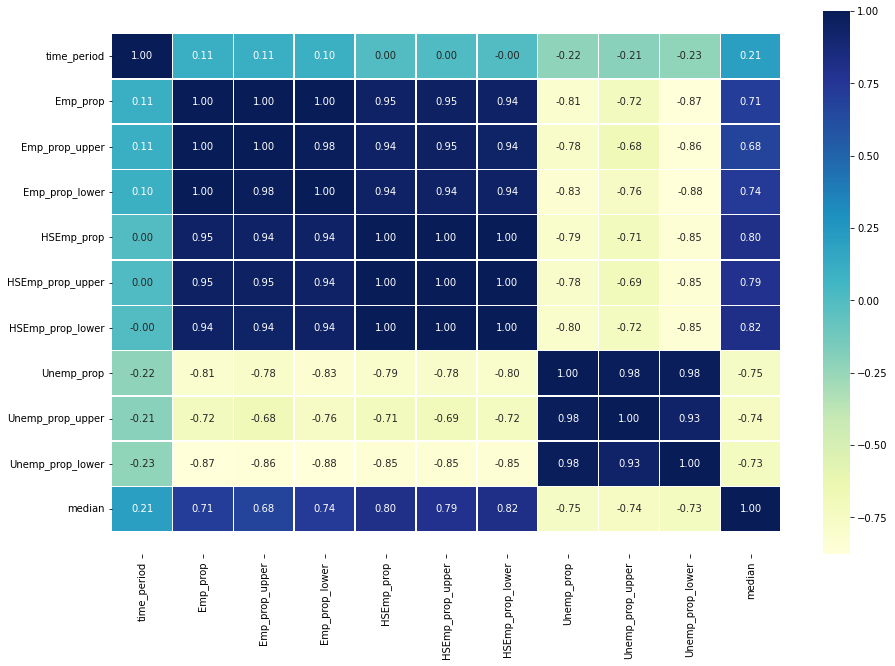

In [43]:
df = pd.read_excel(path)
df.drop('Unnamed: 3',axis=1, inplace=True)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
df.rename(columns={'median': 'Target'},
          inplace=True, errors='raise')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time_period       720 non-null    int64  
 1   Quarter           720 non-null    object 
 2   age_group         720 non-null    object 
 3   gender            720 non-null    object 
 4   graduate_type     720 non-null    object 
 5   Emp_prop          720 non-null    float64
 6   Emp_prop_upper    720 non-null    float64
 7   Emp_prop_lower    720 non-null    float64
 8   HSEmp_prop        720 non-null    float64
 9   HSEmp_prop_upper  720 non-null    float64
 10  HSEmp_prop_lower  720 non-null    float64
 11  Unemp_prop        720 non-null    float64
 12  Unemp_prop_upper  720 non-null    float64
 13  Unemp_prop_lower  720 non-null    float64
 14  Target            720 non-null    int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 84.5+ KB


In [46]:
df.isnull().sum()
#no null values 

time_period         0
Quarter             0
age_group           0
gender              0
graduate_type       0
Emp_prop            0
Emp_prop_upper      0
Emp_prop_lower      0
HSEmp_prop          0
HSEmp_prop_upper    0
HSEmp_prop_lower    0
Unemp_prop          0
Unemp_prop_upper    0
Unemp_prop_lower    0
Target              0
dtype: int64

In [47]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns
numerical_features = numerical_features.drop(['Target'])
numerical_features  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Index(['time_period', 'Emp_prop', 'Emp_prop_upper', 'Emp_prop_lower',
       'HSEmp_prop', 'HSEmp_prop_upper', 'HSEmp_prop_lower', 'Unemp_prop',
       'Unemp_prop_upper', 'Unemp_prop_lower'],
      dtype='object')

In [48]:
categorical_features

Index(['Quarter', 'age_group', 'gender', 'graduate_type'], dtype='object')

In [49]:
# numerical_features = numerical_features.drop(['time_period'])
# categorical_features = categorical_features.drop(['graduate_type', 'Quarter'])
target = 'Target'

In [50]:
scaler = StandardScaler()
lb = LabelBinarizer()

In [51]:
numeric_scaled = scaler.fit_transform(df[numerical_features])

In [52]:
features = 0
for i in categorical_features:
    if type(features) == type(0):
        features = lb.fit_transform(df[i])
    else:
        features = np.c_[features,lb.fit_transform(df[i])]

In [53]:
features = np.c_[features,numeric_scaled]

In [54]:
le = LabelEncoder()
labels = le.fit_transform(df[target])

In [55]:
np.random.seed(42)
X_train, X_test, y_train,y_test = train_test_split(features,labels)

In [56]:
y_test.shape

(180,)

In [57]:
#create an evaluation function(the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_true, y_preds):
  """ Calculates Root Mean Squared Log Error While between
      y_true and y_preds"""
  return np.sqrt(mean_squared_log_error(y_true, y_preds))

#Create function to evaluate model on a few different levels
def show_score(model):
  X_valid = X_test
  y_valid =y_test
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            # "Training RMSLE": rmsle(y_train, train_preds),
            # "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

#Linear Regression

In [58]:
np.random.seed(42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train) #Fit linear model
reg.coef_ #Estimated coefficients for the linear regression problem
reg.predict(X_test) #Predict using the linear model

array([39.39428418, 35.33586328, 26.98586998,  9.97299836, 16.48133287,
       35.29866458, 35.09394515, 13.42909794, 35.07255734, 12.41902203,
       26.63001569, 23.83179901, 32.68860717, 37.29671014, 13.88432924,
       44.16982646, 28.52020971, 26.02103172, 40.39089187, 11.74866025,
       15.50159757, 19.84095692, 32.54707484, 23.47627435, 18.27421257,
       44.9068112 , 32.4167947 , 18.26814276,  4.57763187, 12.59313672,
       21.6516384 , 17.99218213, 38.93858216, 19.58213891,  4.80149853,
       19.60960176, 26.26188557,  4.51005359, 13.38713666,  6.43847132,
       35.58351516, 12.73483758, 33.0707396 , 26.17351315, 14.2409589 ,
       28.44248074, 38.44417946, 14.92395881, 27.77820307, 35.17088337,
        7.83366152, 22.80582581, 22.00918855, 15.36271165, 12.55249504,
       38.96208301, 10.85746326, 11.08481774, 28.30701084, 36.75914696,
        1.83173032, 24.34725004, 27.91311514, 18.52079392, 32.92598192,
       36.96262049, 21.56921044, 13.58679853,  1.05179896,  7.51

In [59]:
show_score(reg)

{'Training MAE': 1.5155431543937543,
 'Valid MAE': 1.6886147342902322,
 'Training R^2': 0.9768119531766454,
 'Valid R^2': 0.9710812812198724}

# SGD Regressor

In [60]:
from sklearn.linear_model import SGDRegressor
np.random.seed(42)
sgd = SGDRegressor()
sgd.fit(X_train, y_train) #Fit linear model
sgd.coef_ #Estimated coefficients for the linear regression problem
show_score(sgd)

{'Training MAE': 1.7527802701365145,
 'Valid MAE': 1.937797112487583,
 'Training R^2': 0.9683048214585422,
 'Valid R^2': 0.9612035910233742}

#Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
treereg = DecisionTreeRegressor()
treereg.fit(X_train,y_train)
show_score(treereg)

{'Training MAE': 0.0,
 'Valid MAE': 0.6333333333333333,
 'Training R^2': 1.0,
 'Valid R^2': 0.981880298642366}

# Neural Network

In [66]:
from keras.layers import Dense, Dropout, Flatten
import keras
from keras.models import Sequential
from tensorflow import keras
np.random.seed(42)
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.mae,
              optimizer=keras.optimizers.SGD(),
              metrics=['mae'])

history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test mae:', score[0])
print('Test mae:', score[1])

Epoch 1/50
5/5 [==============================] - 1s 46ms/step - loss: 21.2090 - mae: 21.2090 - val_loss: 21.9403 - val_mae: 21.9403
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 21.1938 - mae: 21.1938 - val_loss: 21.9246 - val_mae: 21.9246
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 21.1781 - mae: 21.1781 - val_loss: 21.9092 - val_mae: 21.9092
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 21.1675 - mae: 21.1675 - val_loss: 21.8939 - val_mae: 21.8939
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 21.1476 - mae: 21.1476 - val_loss: 21.8793 - val_mae: 21.8793
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 21.1361 - mae: 21.1361 - val_loss: 21.8653 - val_mae: 21.8653
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 21.1212 - mae: 21.1212 - val_loss: 21.8510 - val_mae: 21.8510
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 21.10

#Random Forest Regressor

In [67]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
show_score(rfreg)

{'Training MAE': 0.24655555555555564,
 'Valid MAE': 0.6994444444444444,
 'Training R^2': 0.9988385858460247,
 'Valid R^2': 0.9885677736760579}

#Hyperparameter tuning the best model(randomforest regressor)

In [68]:
%%time
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV

#Different hyperparameters to train our model on
param_grid = {"n_estimators": np.arange(10,100,10),
              "max_depth": [None, 3, 5, 10],
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2),
              "max_features": [0.5, 1,"sqrt","auto"],
              "max_samples": [270]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator= RandomForestRegressor(n_jobs=-1,
                                                               random_state=42),
                              random_state=42,
                              param_distributions= param_grid,
                              cv=5,
                              n_iter = 50,
                              verbose=True)
rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 34 s, sys: 1.34 s, total: 35.3 s
Wall time: 1min 8s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [270],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [69]:
rs_model.best_params_
# {'n_estimators': 40,
#  'min_samples_split': 2,
#  'min_samples_leaf': 1,
#  'max_samples': 270,
#  'max_features': 'auto',
#  'max_depth': None}

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 270,
 'max_features': 'auto',
 'max_depth': None}

In [70]:
show_score(rs_model)   #best model

{'Training MAE': 0.5130092592592592,
 'Valid MAE': 0.8183333333333334,
 'Training R^2': 0.9959257598799374,
 'Valid R^2': 0.98894391103602}

In [71]:
#Ideal hyperparameters used after 50 iterations 
ideal_model = RandomForestRegressor(random_state=42,
                                    n_jobs=-1,
                                    max_depth = None,
                                    n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features= 'auto',
                                    max_samples= 270)
#Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_samples=270, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [72]:
show_score(ideal_model)
#this shows the  accuracy of 0.988 after cross validating the data on various splits hence it being the best model

{'Training MAE': 0.5130092592592592,
 'Valid MAE': 0.8183333333333334,
 'Training R^2': 0.9959257598799374,
 'Valid R^2': 0.98894391103602}

In [73]:
#calculate the feature